#### Université Paul Sabatier  2016-2017, L3 MAPI3 MES http://www.math.univ-toulouse.fr/l31
# Simulations stochastiques - TP1

- Le rouge est réservé aux densité et fonction de répartition théoriques (versus empiriques).
- L'échelle verticale de la fonction <code>hist</code> correspond à des comptages. L'option <code>normed=True</code> permet d'obtenir une aire totale égale à 1.
- En tête pour charger les fonctions nécessaires au TP.

In [2]:
%matplotlib inline
from matplotlib.pyplot import *
from math import *
from numpy import *
from numpy.random import *
from scipy.misc import *
#from scipy import *

## Question 1: Simulation d'une variable aléatoire uniforme dans [0,1].

[[0.09731421]
 [0.69633842]
 [0.12233276]
 [0.65892617]
 [0.85986059]]


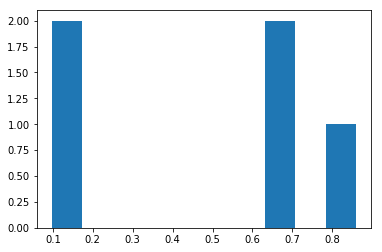

In [3]:
X = rand(5,1);  
print(X)            ## Les arguments correspondent à la taille du tableau de sortie
hist(X);            ## hist affiche par défaut des sommes (non normalisé).

[0.  0.2 0.4 0.6 0.8 1. ]


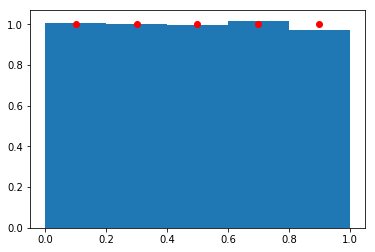

In [4]:
N=10**4; 
X=rand(N,1);
print(linspace(0,1,6))                          ## linspace génère 6 points uniformément espacés entre 0 et 1
hist(X, bins = linspace(0,1,6), normed = True); ## hist trace l'histograme de "X", les segments sont donnés par "bins".
plot( linspace(0.1,0.9,5), [1]*5, 'ro' );       ## 'ro' trace des points ronds rouges

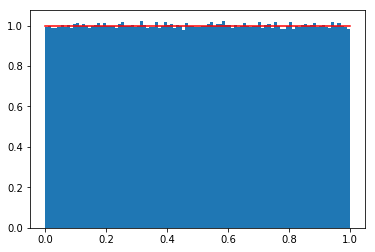

In [5]:

N=10**6; X=rand(N,1);
hist(X, bins = linspace(0,1,101), normed = True);
plot([0,1],[1,1],'r')    ## 'r' trace une ligne en rouge

## Question 2: Loi exponentielle de paramètre 1/2.

L'espérance 2, cf <code>exponential</code>. Pour $x > 0$, $f(x) = (1/2)e^{-x/2}$ et $F(x) = 1 - e^{-x/2}$. $F^{-1}(u) = -2 \ln(1 - u)$ où $1 - U \sim U$.

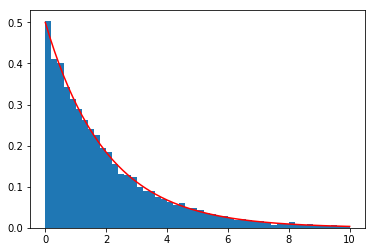

In [6]:
N=10**4; U=rand(N,1);
X=-2*log(U);                                          ## application terme à terme du log
hist(X, bins = linspace(0,10,51), normed = True); 
xx=linspace(0,10,201);
plot(xx,exp(-xx/2)/2 ,'r')

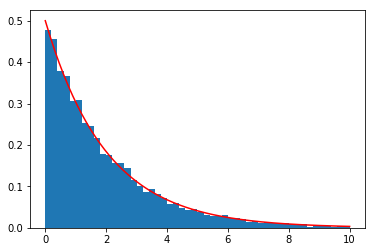

In [7]:
X=exponential(2, (N,1));
hist(X, bins = linspace(0,10,51), normed = True); 
plot(xx,exp(-xx/2)/2,'r')

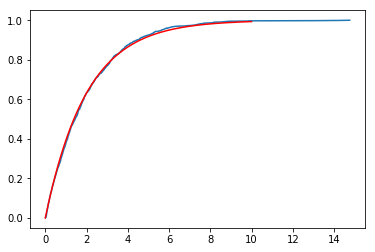

In [8]:
N = 10**3;
X=exponential(2, (N,1));
X=sorted(X);
plot(X,linspace(1/N,1,N))        ## Tracé de la fonction de répartition empirique
plot(xx,1 - exp(-xx/2),'r')

## Question 3: Minimum de deux lois exponentielles.

Si $X, Y \sim \text{Exp}(1/2)$ sont indépendantes, $\min\{X, Y\} \sim \text{Exp}(1)$.

[0.13611819 1.04560724]


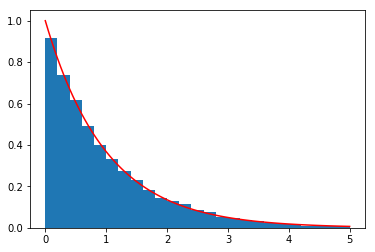

In [9]:
N = 10**4; X=exponential(2, (N,2));
print(X[0,:])
X=sort(X,axis = 1); ## sort trie chaque ligne (selon le second axe, la numérotation commence à 0)
hist(X[:,0], bins = linspace(0,5,26), normed = True); ## X[:,0] donne la première colone de X
xx=linspace(0,5,101)
plot(xx,exp(-xx),'r')


## Question 4: Uniforme $\{0,1,2,\ldots,10\}$.

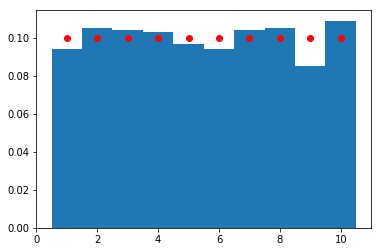

In [10]:
N=10**3; X=ceil(10*rand(N,1));
hist(X, bins = linspace(0.5,10.5,11), normed = True);
plot( linspace(1,10,10), [1./10]*10, 'ro' );  

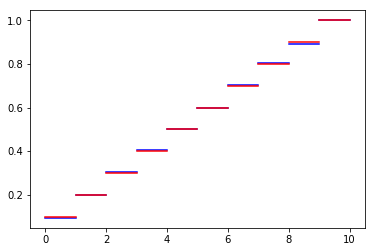

In [11]:
E=zeros((10,1))

for i in range(N):                               ## range(N) renvoie [0,1,2,...,N-1]
    E[ int(X[i]) - 1 ] = E[ int(X[i]) - 1 ] + 1  ## Conversion en entier pour accéder à des éléments d'un tableau

F = cumsum(E)/N  ## cumsum calcule les sommes partielles

for i in range(10):
    plot([i, i+1],[F[i], F[i]], 'b')
    plot([i, i+1],[float(i+1)/10, float(i+1)/10],'r')

## Question 5: Poisson de paramètre 4. 
$P(X = k) = e^{-4} 4^k/k!$ où $k \in \mathbb{N}$. $k =i-1$ dans le code.

/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  after removing the cwd from sys.path.


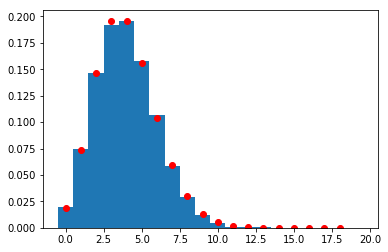

In [12]:
N=10**4; X=zeros((N,1));
p = zeros((19,1))
for i in range(19):
    p[i] = exp(-4) * 4**(float(i)) / factorial(i)

cp = cumsum(p)
cp = append(cp,1)   ## append rajoute un élément à la fin du tableau

for i in range(N):
    X[i] = where(rand() < cp)[0][0]   ##where( ... )[0][0] donne le premier indice tel que ... est vrai

hist(X, bins = linspace(-0.5,19.5,21), normed = True);
plot( range(19), p, 'ro' );  


## Question 6: Simulation de loi de Poisson par les produits d’uniformes.

$\prod_{j=1}^{K+1} U_j < e^{-5}  \leq \prod_{j=1}^{K} U_j$ définit $K$ qui s'avère $\text{Poi}(5)$.

/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  # Remove the CWD from sys.path while we load stuff.


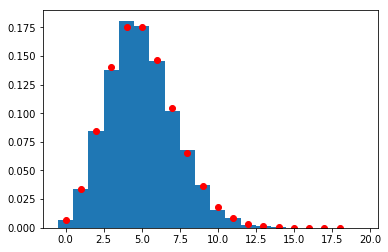

In [13]:
N=10**4; K=-ones((N,1));
for i in range(N):
    produit = 1;
    while produit>exp(-5):
        produit = produit*rand(); 
        K[i]=K[i]+1;

hist(K, bins = linspace(-0.5,19.5,21), normed = True);
xx=linspace(0,18,19)
plot( xx, exp(-5)*5**xx / factorial(xx), 'ro' ); 

## Question 7: Box Muller. 
Vecteur gaussien. $(X, Y)$. $X^2 + Y^2 \sim \text{Exp}(1/2)$. Algorithme de génération de la loi normale à partir de générateurs aléatoires uniformes $U$ et $V$ sans utiliser $F$ et $F^{-1}$, non explicites.

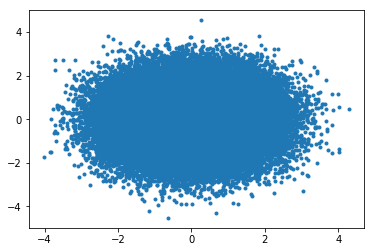

In [14]:
N=10**5;
X=normal(0, 1, (N,1));
Y=normal(0, 1, (N,1));
plot(X,Y,'.')

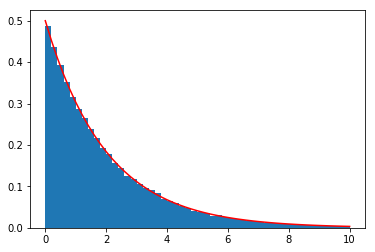

In [15]:
hist(X**2 + Y**2, bins = linspace(0,10,51), normed = True);
xx=linspace(0,10,51); 
plot(xx, exp(-xx/2)/2 ,'r')

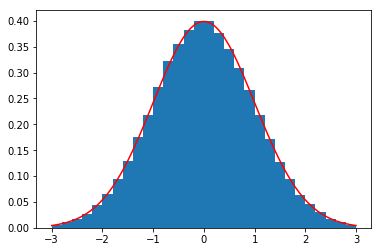

In [18]:
U=rand(N,1); V=pi*rand(N,1);
X = sqrt(-2*log(U)) * cos(V) 
hist(X, bins = linspace(-3,3,31), normed = True);
xx=linspace(-3,3,121); 
plot(xx, exp(-xx**2/2)/(sqrt(2*pi)), 'r')

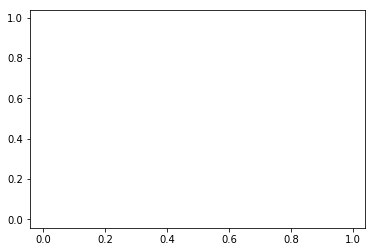

In [17]:
x=-log(rand(5000,4));
s=sum(x, axis=1);
for i in range(0, 5000):
    x[i,:]=x[i,:]/s[i]
    px=x[i,0]*0+x[i,1]*0+x[i,2]*1+x[i,3]*1;
    py=x[i,0]*0+x[i,1]*1+x[i,2]*0+x[i,3]*1;
    plot(px,py,'')